In [1]:

# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [2]:
# 2. Load Dataset
df = pd.read_csv("/content/patient_data.csv")  # Replace with correct path if needed
df.head()


,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [3]:
# 3. Basic Info
df.info()
print("\nShape of Dataset:", df.shape)
print("\nNull Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   C                1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB

Shape of Dataset: (1825, 14)

Null Values:
 C                  0
Age                0
History            0
Patient            0
T

In [4]:
# 4. Data Preprocessing
# Rename columns if needed
df.rename(columns={'C': 'gender'}, inplace=True)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [5]:
# 5. Descriptive Statistics
df.describe(include='all')


,gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.921096,1.013151,0.465205,0.484932,1.026849,1.026301,1.965479,2.717808,0.460822,1.777534
std,0.500137,1.098723,0.289183,0.498599,0.854759,0.786287,0.498925,0.499910,0.678493,0.810680,1.158215,1.256490,0.498599,1.970962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,4.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,5.000000


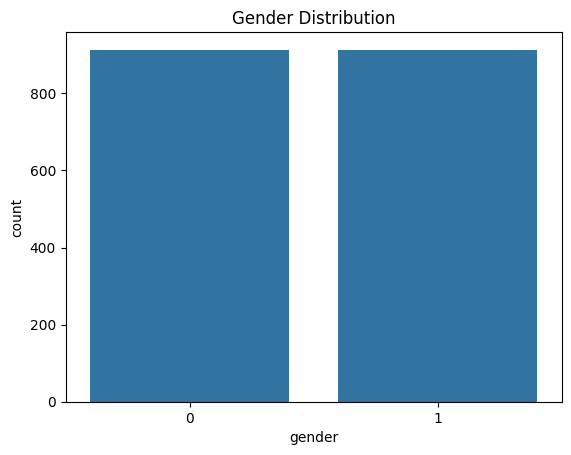

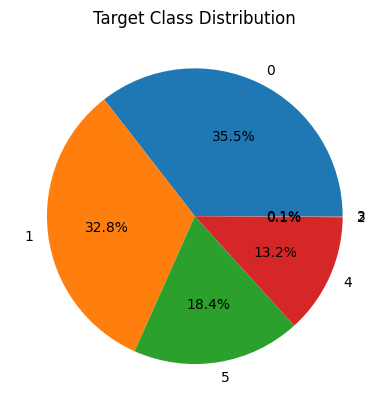

In [13]:
# 6. Visual Analysis - Univariate
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Pie chart (e.g., for target variable)
df['Stages'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Target Class Distribution")
plt.ylabel("")
plt.show()


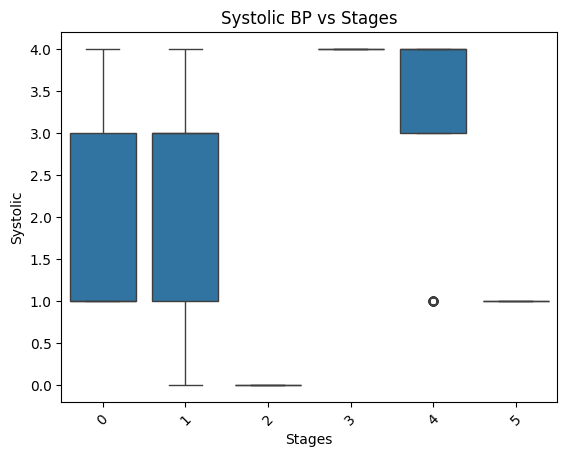

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns to numeric
df["Systolic"] = pd.to_numeric(df["Systolic"], errors='coerce')
df["Diastolic"] = pd.to_numeric(df["Diastolic"], errors='coerce')

# Boxplot - Systolic BP vs Stages
sns.boxplot(x='Stages', y='Systolic', data=df)
plt.title("Systolic BP vs Stages")
plt.xticks(rotation=45)
plt.show()


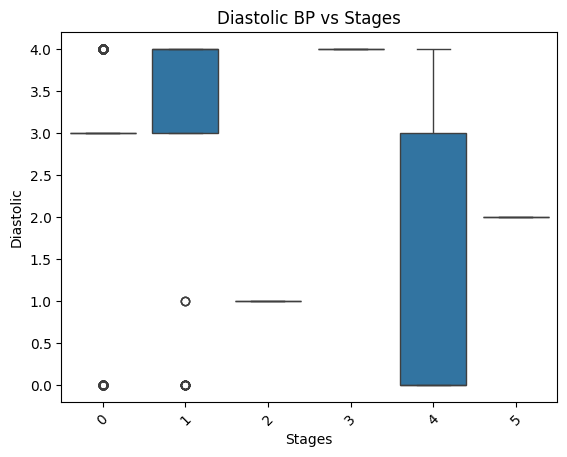

In [17]:
sns.boxplot(x='Stages', y='Diastolic', data=df)
plt.title("Diastolic BP vs Stages")
plt.xticks(rotation=45)
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

# Replace "stages" with your actual target column name
X = df.drop("Stages", axis=1)   # Independent features
y = df["Stages"]                # Target variable

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian NB Accuracy:", accuracy_score(y_test, gnb_pred))


Logistic Regression Accuracy: 0.9863013698630136
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 0.9972602739726028
Gaussian NB Accuracy: 1.0


In [26]:
# 10. Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, lr_pred))
print("="*60)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, rf_pred))
print("="*60)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, dt_pred))
print("="*60)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Report:")
print(classification_report(y_test, gnb_pred))
print("="*60)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       0.92      1.00      0.96        60

    accuracy                           0.99       365
   macro avg       0.98      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365

Decision Tree Report:
              precision    recall  f1-score   support

   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# 11. Save Best Model
pickle.dump(rf, open("model.pkl", "wb"))
print("Model saved as model.pkl")


Model saved as model.pkl


In [ ]:
'''predictive_pulse/
│
├── app1.py                  # Flask web app
├── model.pkl                # Trained ML model
├── patient_data.csv         # Dataset (optional, for reference)
├── requirements.txt         # Python dependencies
│
├── templates/
│   └── index.html           # Frontend form
'''

In [ ]:
'''python -m venv venv
source venv/bin/activate   # Linux/Mac
venv\Scripts\activate      # Windows
'''

In [ ]:
pip install flask pandas scikit-learn numpy


In [ ]:
pip freeze > requirements.txt


In [ ]:
from flask import Flask, request, render_template
import pickle
import numpy as np

app = Flask(__name__)

# Load trained model
model = pickle.load(open("model.pkl", "rb"))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    inputs = [float(x) for x in request.form.values()]
    features = np.array(inputs).reshape(1, -1)
    prediction = model.predict(features)
    return render_template('index.html', prediction_text=f"Predicted Blood Pressure Stage: {prediction[0]}")

if __name__ == "__main__":
    app.run(debug=True)


In [ ]:
'''<!DOCTYPE html>
<html>
<head>
    <title>Predictive Pulse</title>
</head>
<body>
    <h2>Blood Pressure Prediction</h2>
    <form action="/predict" method="post">
        <label>Age:</label><input type="text" name="age"><br>
        <label>Gender (0 for Male, 1 for Female):</label><input type="text" name="gender"><br>
        <label>Pulse:</label><input type="text" name="pulse"><br>
        <label>Activity Level:</label><input type="text" name="activity"><br>
        <!-- Add more inputs as per your model -->
        <input type="submit" value="Predict">
    </form>
    <h3>{{ prediction_text }}</h3>
</body>
</html>'''


In [ ]:
'''5. Run Your App Locally
In the terminal:

bash
Copy code
python app1.py'''